# SUPPORT VECTOR MACHINE

## Dataset Selection:
For this assignment, we'll utilize the widely recognized Mushroom Dataset


## importing dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix



import warnings
warnings.filterwarnings('ignore')

## load mushroom dataset

In [2]:
df=pd.read_csv("mushroom.csv")

In [3]:
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


## Task 1: Exploratory Data Analysis (EDA)

### check for datatypes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

### remove unnamed column

In [5]:
df=df.drop('Unnamed: 0',axis=1)

In [6]:
df

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,bell,smooth,white,no,pungent,free,close,narrow,orange,enlarging,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   object 
 1   cap_surface               2000 non-null   object 
 2   cap_color                 2000 non-null   object 
 3   bruises                   2000 non-null   object 
 4   odor                      2000 non-null   object 
 5   gill_attachment           2000 non-null   object 
 6   gill_spacing              2000 non-null   object 
 7   gill_size                 2000 non-null   object 
 8   gill_color                2000 non-null   object 
 9   stalk_shape               2000 non-null   object 
 10  stalk_root                2000 non-null   object 
 11  stalk_surface_above_ring  2000 non-null   object 
 12  stalk_surface_below_ring  2000 non-null   object 
 13  stalk_color_above_ring    2000 non-null   object 
 14  stalk_co

### summary statistics

In [8]:
df.describe()

,stalk_height,cap_diameter
count,2000.000000,2000.000000
mean,8.449118,12.314345
std,3.697217,7.048845
min,2.000000,1.000000
25%,5.291009,5.723521
50%,8.318596,12.124902
75%,11.781272,18.698605
max,15.095066,25.000054


### check for missing values

In [9]:
df.isnull().sum()

cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

#### observation:
it contains 0 missing values

In [10]:
df['class'].value_counts()


class
poisonous    1400
edible        600
Name: count, dtype: int64

<Axes: xlabel='class', ylabel='count'>

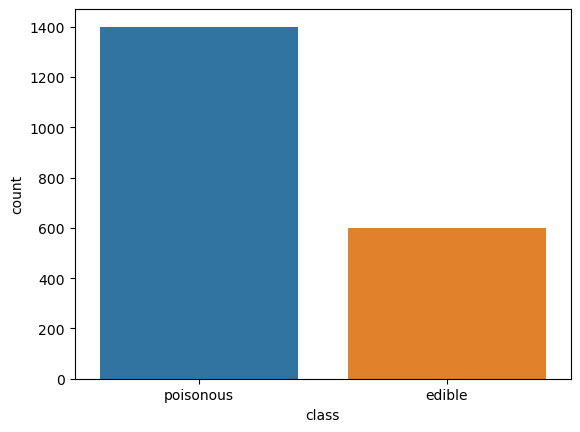

In [11]:
sns.countplot(data=df,x='class')

#### observation :
the target data is inbalances

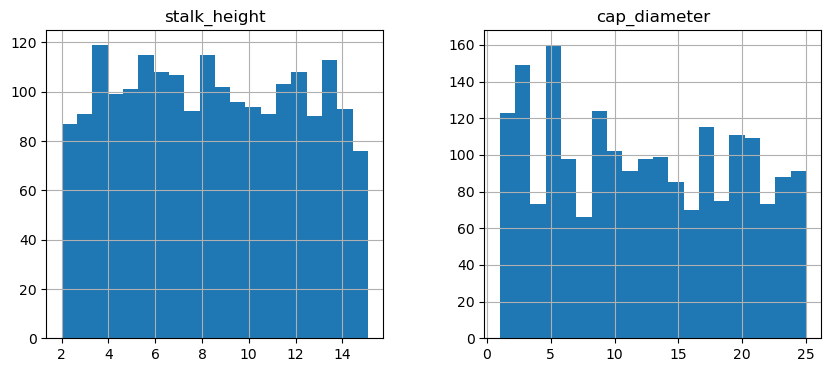

In [12]:
# Histograms for numerical features
df[['stalk_height', 'cap_diameter']].hist(figsize=(10, 4), bins=20)
plt.show()


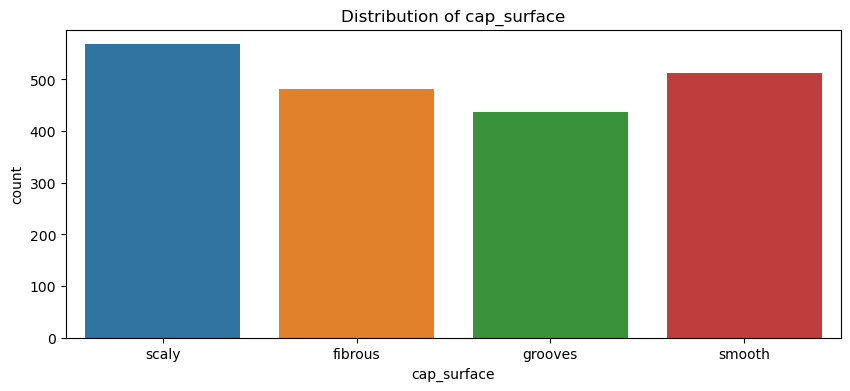

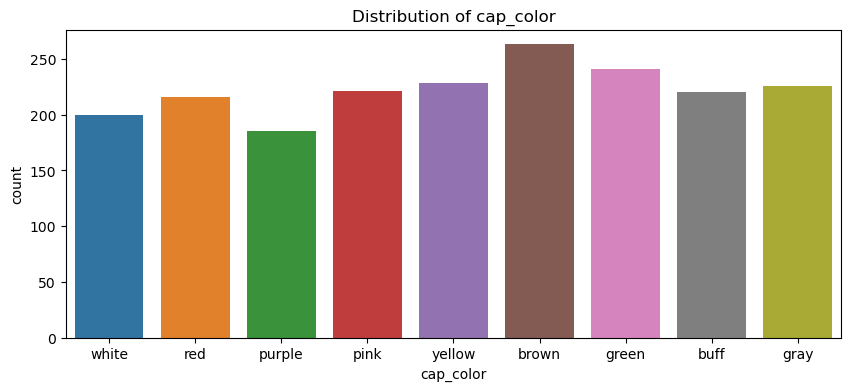

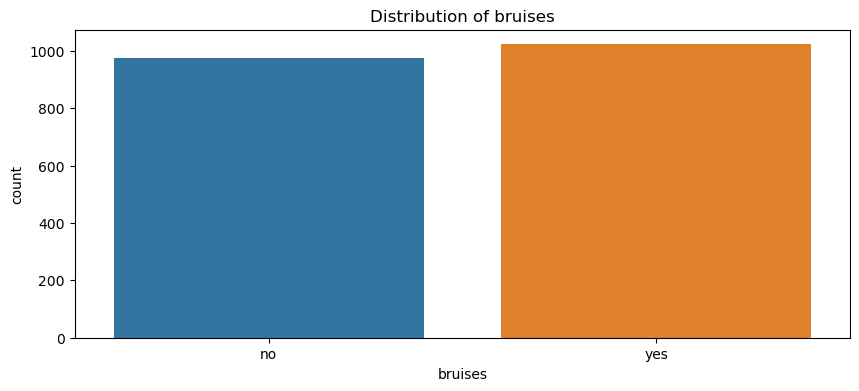

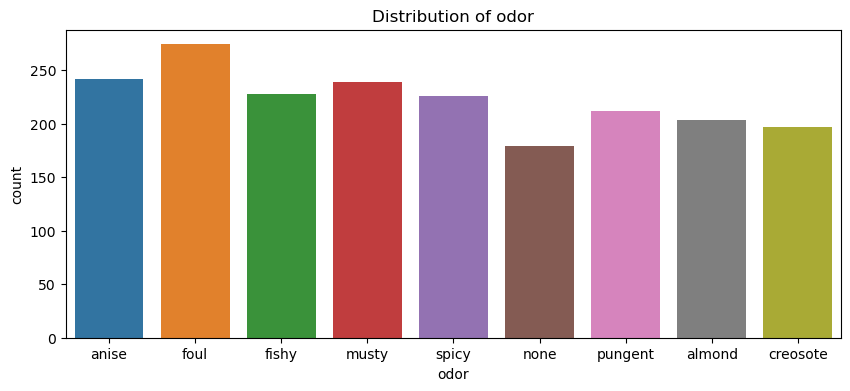

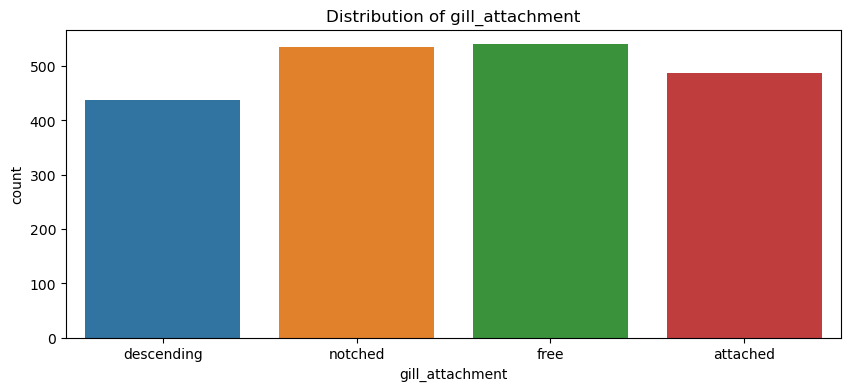

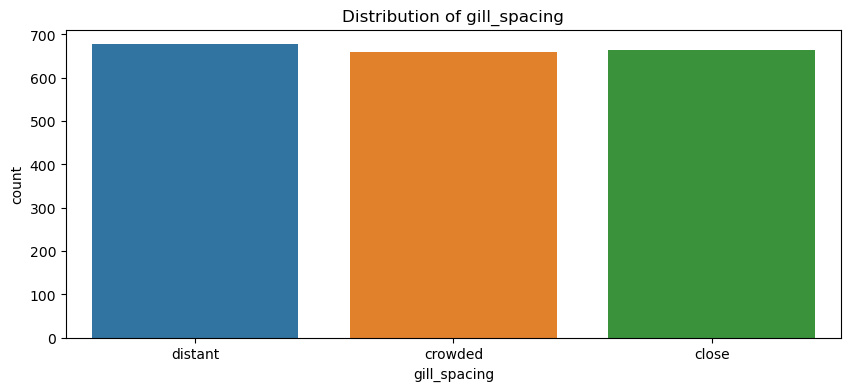

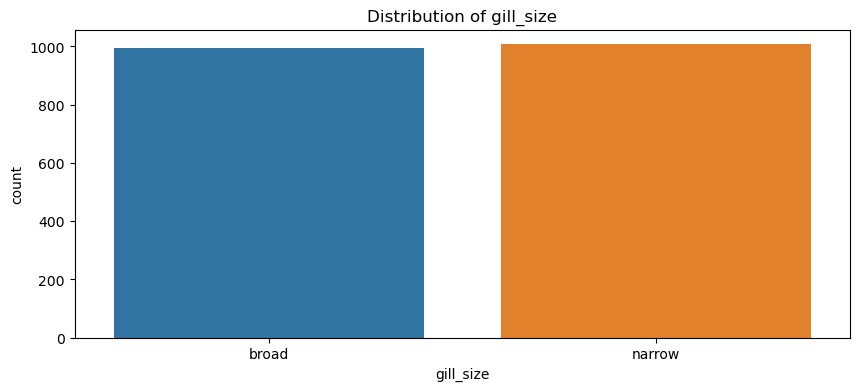

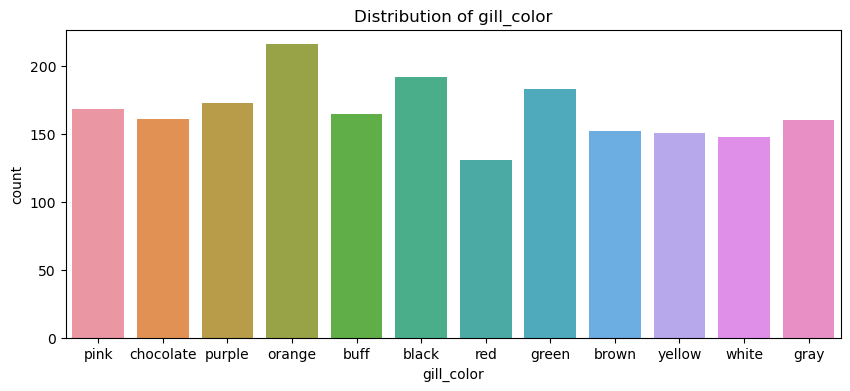

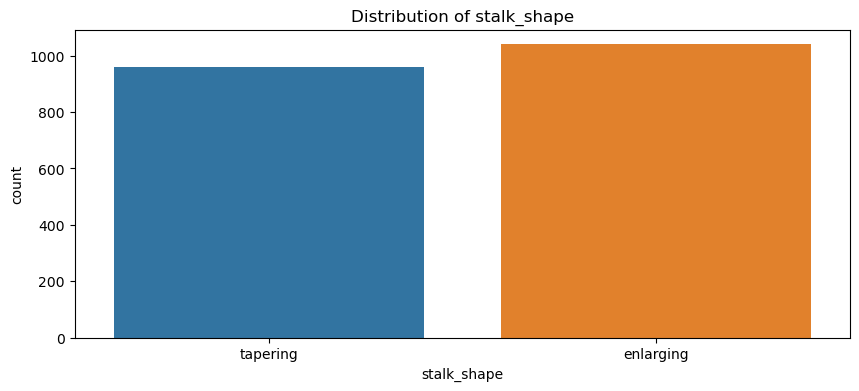

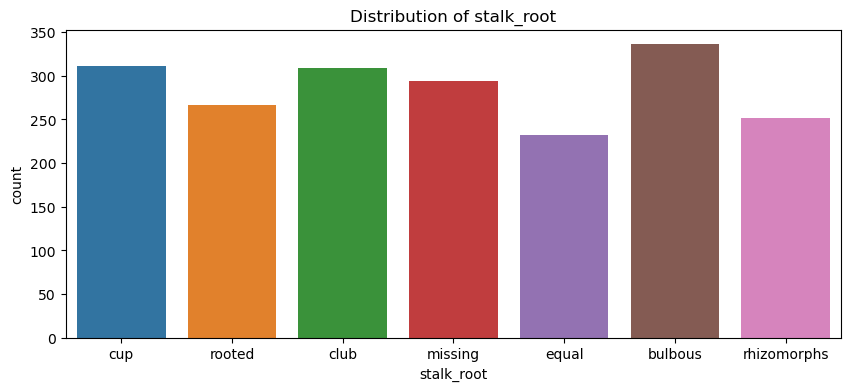

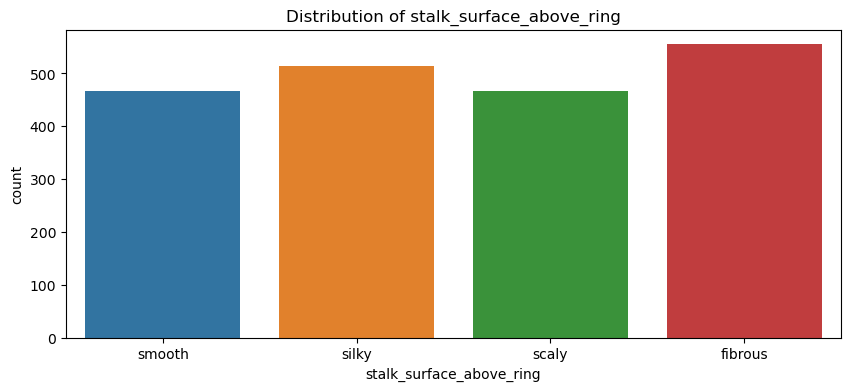

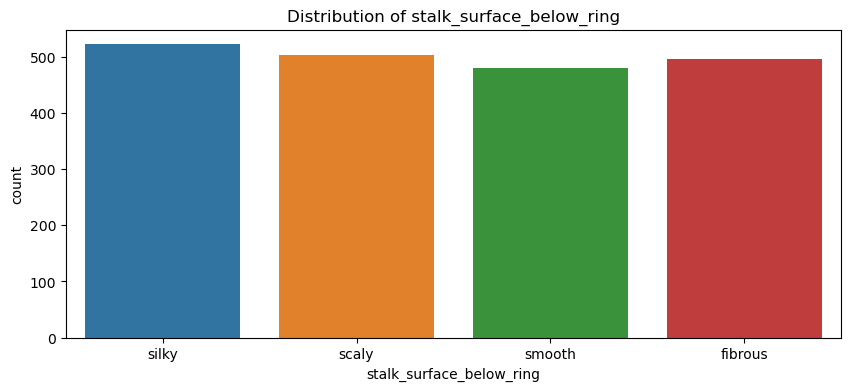

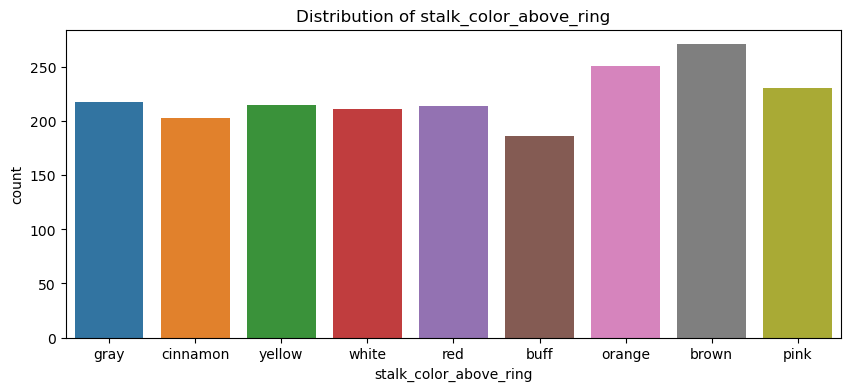

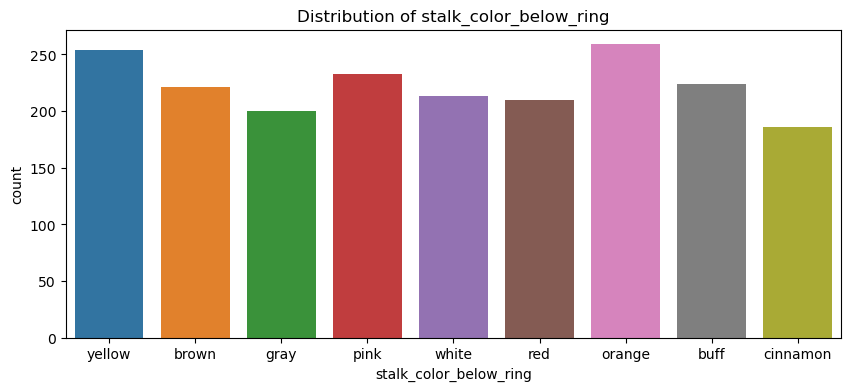

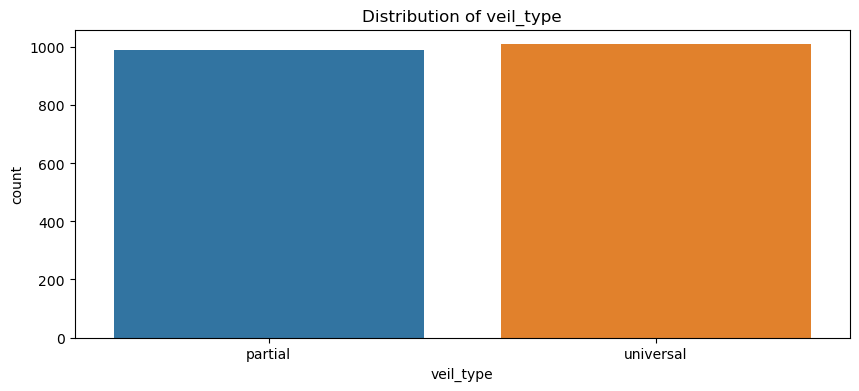

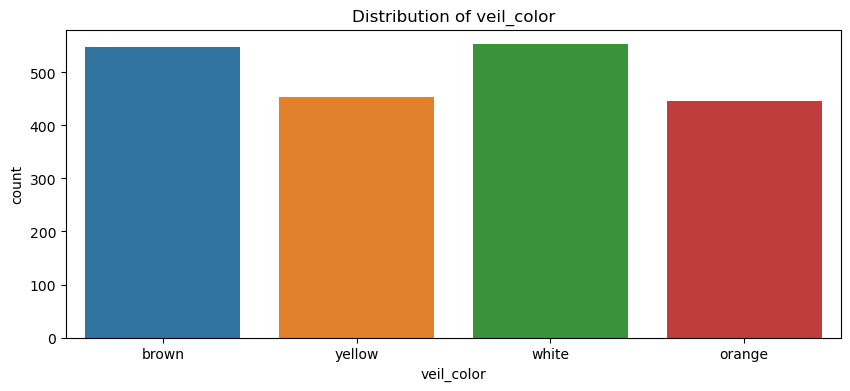

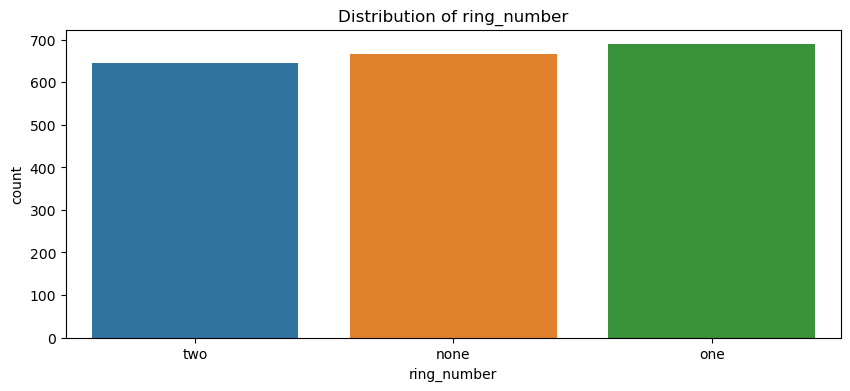

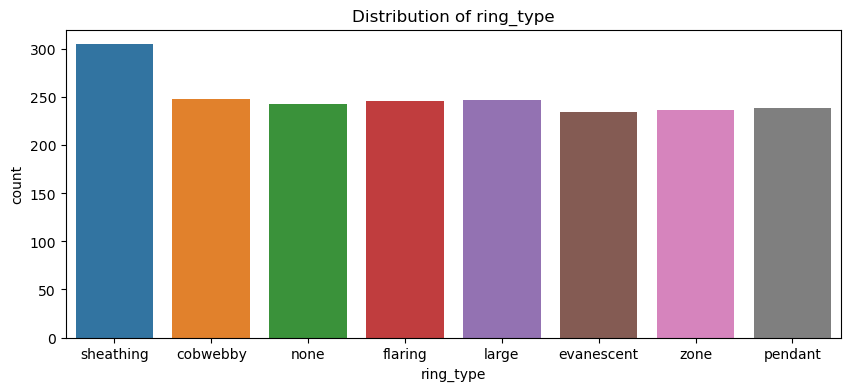

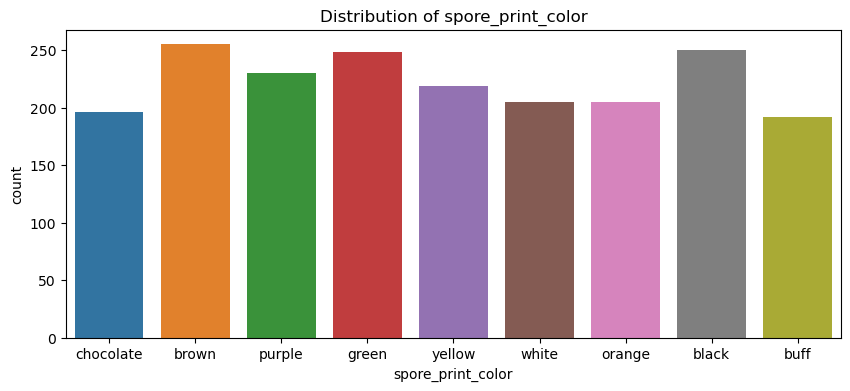

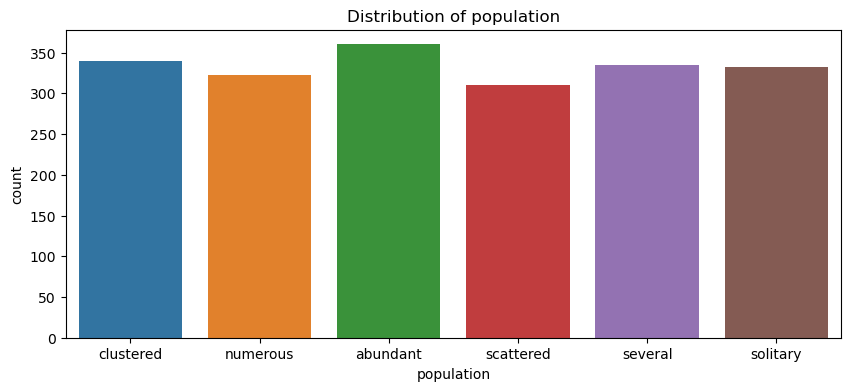

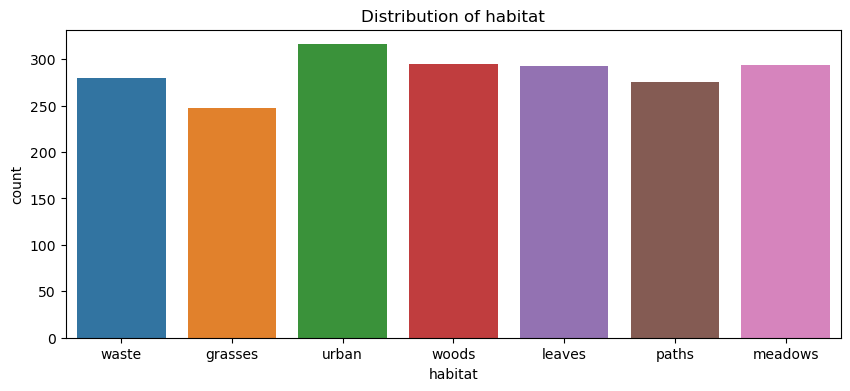

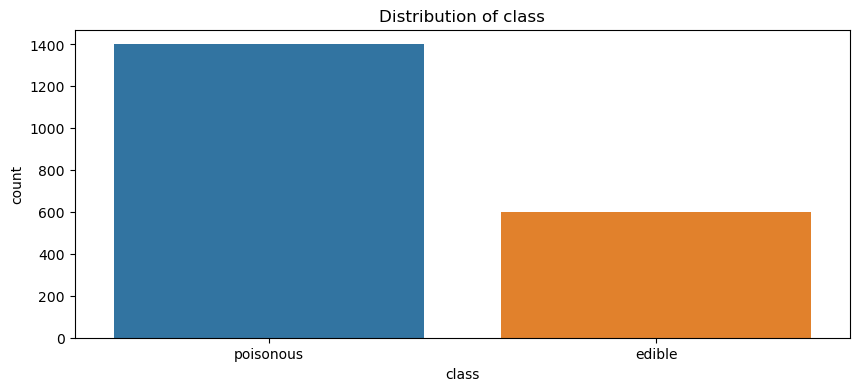

In [13]:
# Count plots for categorical features
for column in df.columns[1:23]:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.show()


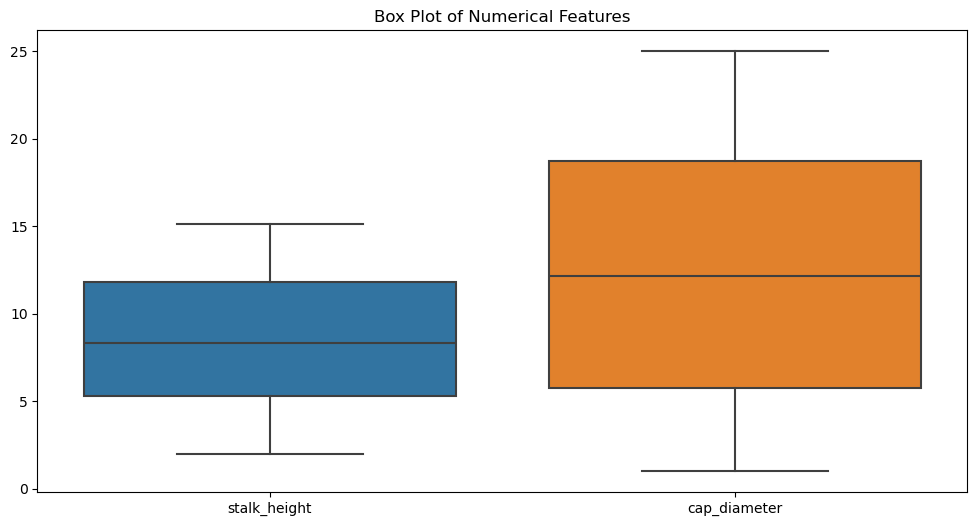

In [14]:
# Box plots for numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['stalk_height', 'cap_diameter']])
plt.title('Box Plot of Numerical Features')
plt.show()

## Task 2: Data Preprocessing
1.	Encode categorical variables if necessary.


In [15]:
df = df.astype('category')

In [16]:
df.dtypes


cap_shape                   category
cap_surface                 category
cap_color                   category
bruises                     category
odor                        category
gill_attachment             category
gill_spacing                category
gill_size                   category
gill_color                  category
stalk_shape                 category
stalk_root                  category
stalk_surface_above_ring    category
stalk_surface_below_ring    category
stalk_color_above_ring      category
stalk_color_below_ring      category
veil_type                   category
veil_color                  category
ring_number                 category
ring_type                   category
spore_print_color           category
population                  category
habitat                     category
class                       category
stalk_height                category
cap_diameter                category
dtype: object

In [17]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [18]:
df

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,916,190
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,128,750
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,537,281
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,234,829
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,895,484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4,2,0,1,4,0,1,1,3,1,...,0,1,1,2,6,0,1,1,283,680
1996,4,2,5,1,5,0,2,1,9,1,...,0,2,1,7,8,2,5,1,335,521
1997,2,1,3,1,3,3,0,1,7,1,...,0,0,2,1,8,0,6,1,859,438
1998,0,3,7,0,7,2,0,1,6,0,...,1,3,1,0,1,5,6,1,679,320


## Let's look at the correlation between the variables

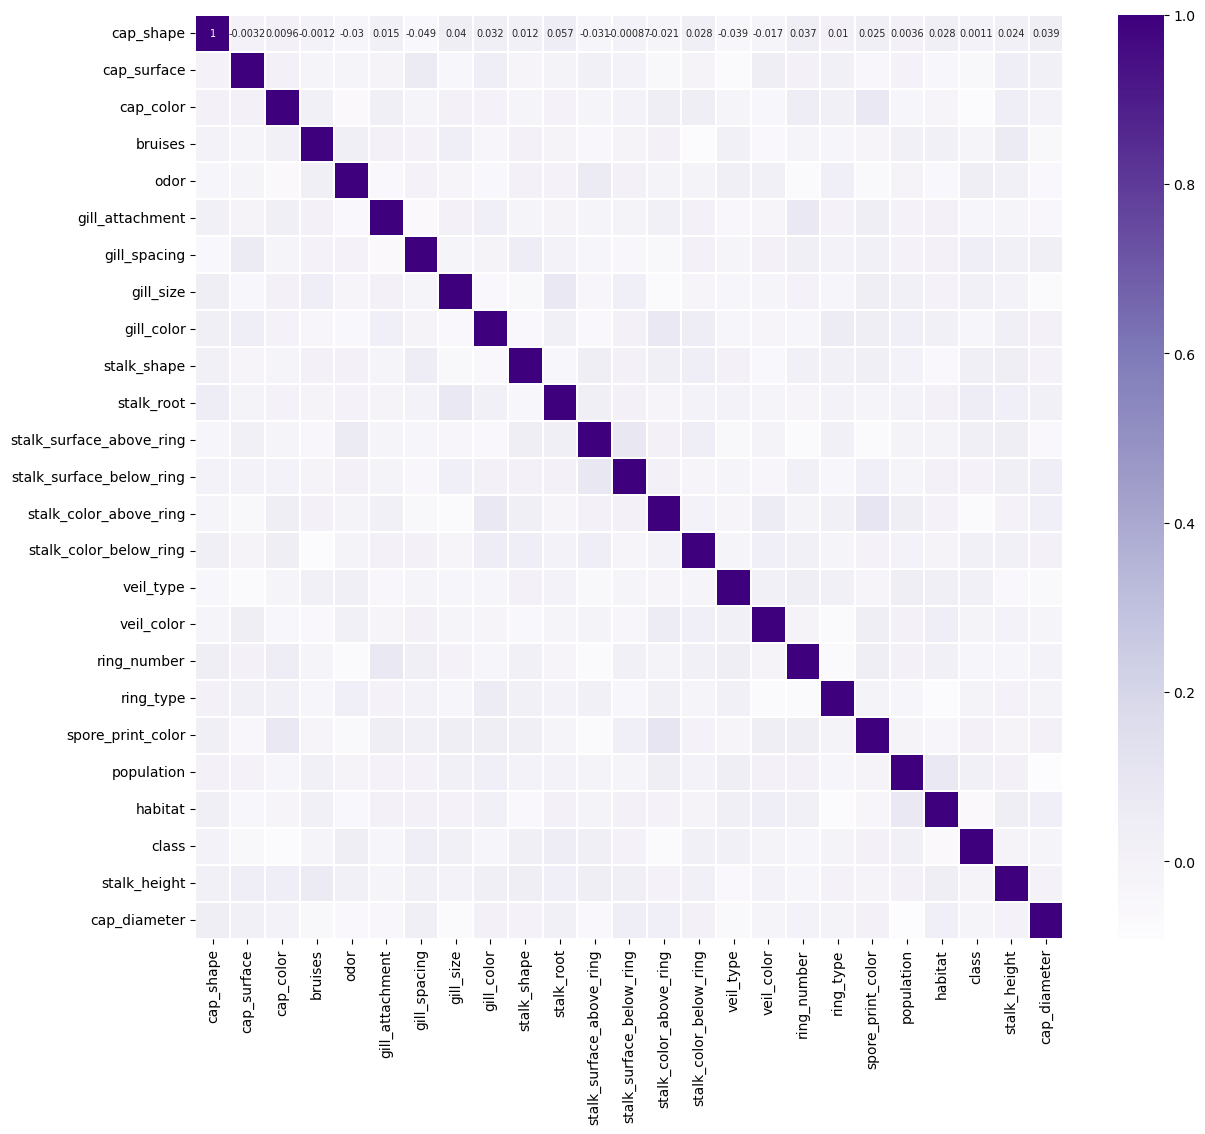

In [19]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);
#plt.savefig("corr.png", format='png', dpi=900, bbox_inches='tight')

In [20]:
df.corr()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
cap_shape,1.000000,-0.003244,0.009615,-0.001190,-0.030119,0.015477,-0.048783,0.040497,0.032123,0.011573,...,-0.039029,-0.017399,0.036999,0.010172,0.024596,0.003602,0.028388,0.001140,0.023586,0.038942
cap_surface,-0.003244,1.000000,0.003153,-0.021352,-0.021926,-0.010513,0.068918,-0.038490,0.045561,-0.024032,...,-0.068705,0.040341,0.005855,0.017616,-0.042134,-0.003963,-0.038661,-0.046409,0.043168,0.016084
cap_color,0.009615,0.003153,1.000000,0.016445,-0.065410,0.023835,-0.015628,0.009888,-0.005898,-0.020397,...,-0.020039,-0.036166,0.055593,0.021509,0.082155,-0.027551,-0.025568,-0.078029,0.043899,-0.000427
bruises,-0.001190,-0.021352,0.016445,1.000000,0.026274,0.009402,-0.004458,0.041851,-0.035135,0.007928,...,0.016775,-0.053680,-0.022588,-0.028750,-0.026481,0.012976,0.013392,-0.015498,0.066449,-0.045774
odor,-0.030119,-0.021926,-0.065410,0.026274,1.000000,-0.055214,-0.002847,-0.027313,-0.051793,0.009072,...,0.028177,0.015397,-0.068819,0.033956,-0.057705,-0.011753,-0.051237,0.039536,0.012637,-0.054402
gill_attachment,0.015477,-0.010513,0.023835,0.009402,-0.055214,1.000000,-0.063604,0.009386,0.035279,-0.018698,...,-0.042727,-0.023648,0.080437,-0.006025,0.039356,-0.002649,0.005944,-0.028194,-0.015984,-0.041098
gill_spacing,-0.048783,0.068918,-0.015628,-0.004458,-0.002847,-0.063604,1.000000,-0.022650,-0.010729,0.051041,...,-0.016567,0.004960,0.024984,0.001516,0.016376,-0.004920,0.004055,0.046505,0.014766,0.030303
gill_size,0.040497,-0.038490,0.009888,0.041851,-0.027313,0.009386,-0.022650,1.000000,-0.054736,-0.046759,...,-0.029072,-0.016722,-0.005476,-0.028746,0.039395,0.018937,-0.004307,0.019858,-0.001054,-0.068738
gill_color,0.032123,0.045561,-0.005898,-0.035135,-0.051793,0.035279,-0.010729,-0.054736,1.000000,-0.056446,...,-0.029070,-0.026018,-0.029421,0.058992,0.037690,0.034533,0.018815,-0.028083,0.026476,0.004822
stalk_shape,0.011573,-0.024032,-0.020397,0.007928,0.009072,-0.018698,0.051041,-0.046759,-0.056446,1.000000,...,0.004404,-0.051294,0.014983,0.011554,0.027410,-0.000393,-0.054938,0.024023,0.037361,-0.005188


### 2.	Split the dataset into training and testing sets.

In [21]:
X = df.drop(['class'], axis=1)  
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)   

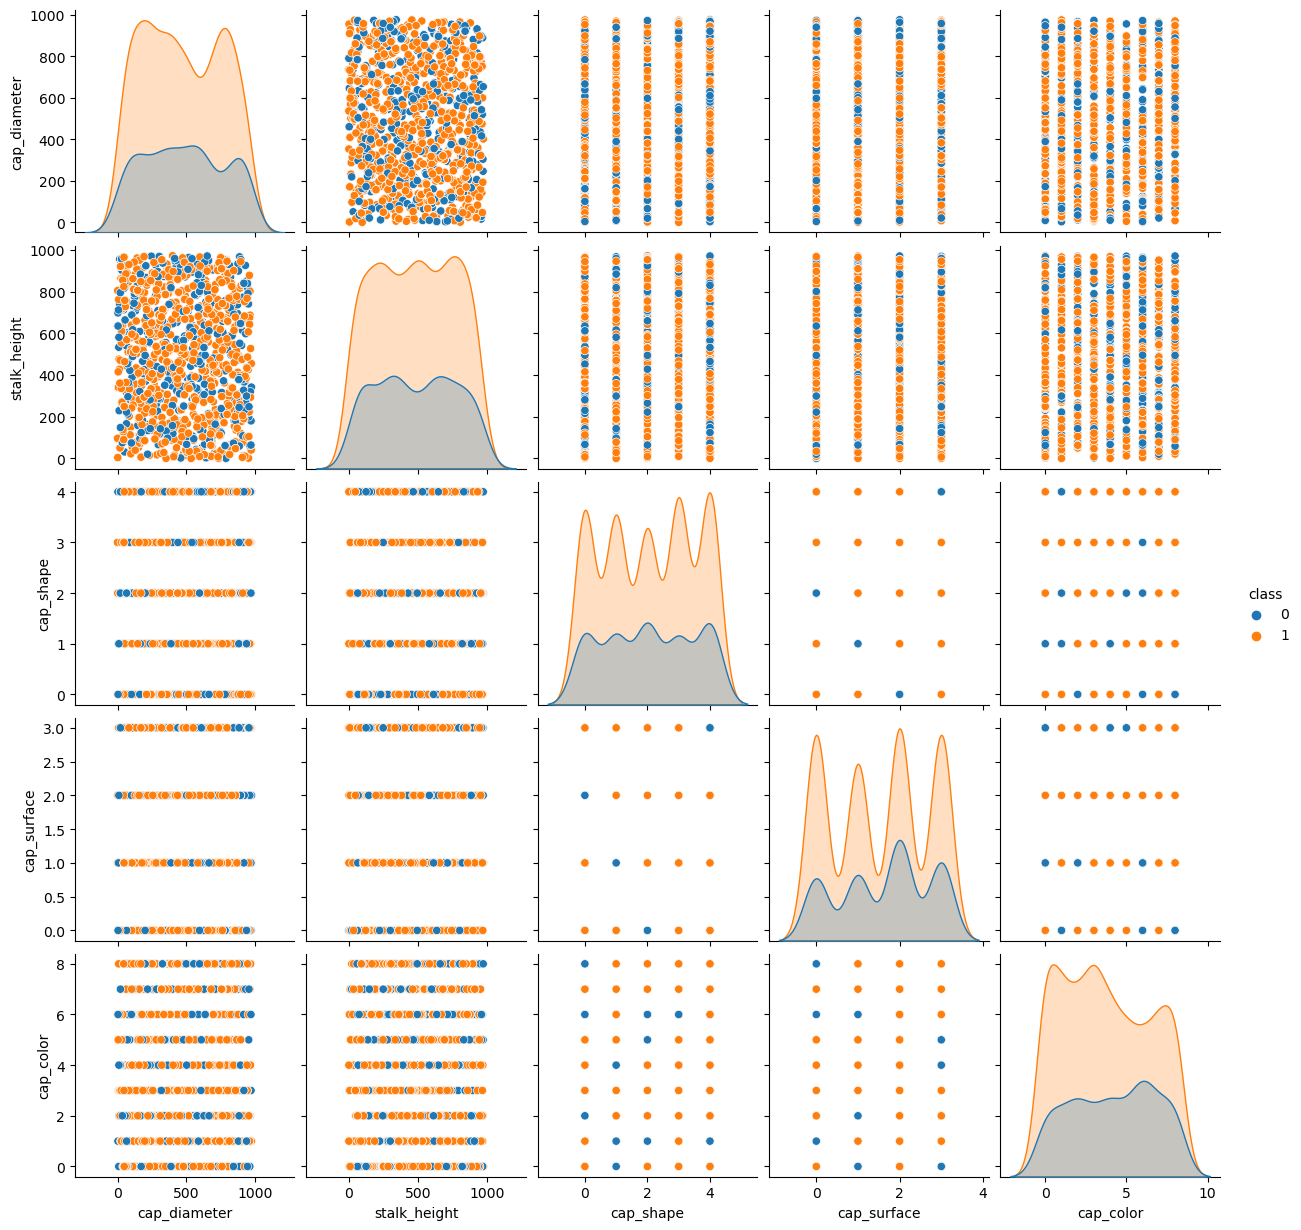

In [22]:
# Pair plot for a subset of features due to high dimensionality
subset_columns = ['cap_diameter', 'stalk_height', 'cap_shape', 'cap_surface', 'cap_color']
sns.pairplot(df[subset_columns + ['class']], hue='class')
plt.show()

### check distribution of target column

<Axes: xlabel='class', ylabel='count'>

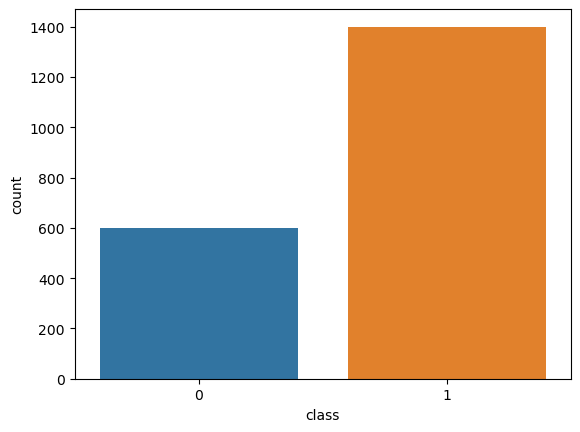

In [23]:
sns.countplot(data=df,x='class')

### observation :
the target dat is imbalanced so the model will only understand the high frequency data and data so we have to balance this data 

### SMOTE 

In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


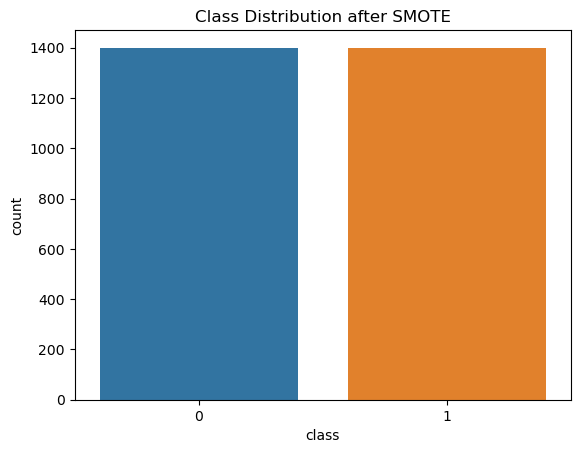

In [26]:
# Check the new class distribution
sns.countplot(x=y_resampled)
plt.title('Class Distribution after SMOTE')
plt.show()

#### SMOTE (Synthetic Minority Over-sampling Technique) : to generate synthetic samples for the minority class.
Random Undersampling to reduce the number of samples in the majority class.

## model building

## model building on original data

In [27]:
model = SVC()
model.fit(X_train, y_train)  # Train the SVM model on the training data
y_pred = model.predict(X_test)  # Predict on the test data
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

### 3.	Evaluation of model 

In [28]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Detailed classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.665
Precision: 0.665
Recall: 1.0
F1 Score: 0.7987987987987988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        67
           1       0.67      1.00      0.80       133

    accuracy                           0.67       200
   macro avg       0.33      0.50      0.40       200
weighted avg       0.44      0.67      0.53       200



In [29]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[  0,  67],
       [  0, 133]], dtype=int64)

### observation :
we observed from this confusion matrix that the model only understand the poisonous class because the data is imbalanced 

### model building after using SMOTE 

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [31]:
svm = SVC()

# Train the SVM model on the smote training data
svm.fit(X_train, y_train)

# Predict on the smote test data
y_pred = svm.predict(X_test)

In [32]:
# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


print(classification_report(y_test, y_pred))

Accuracy: 0.5017857142857143
Precision: 0.49743589743589745
Recall: 0.7003610108303249
F1 Score: 0.5817091454272864
              precision    recall  f1-score   support

           0       0.51      0.31      0.38       283
           1       0.50      0.70      0.58       277

    accuracy                           0.50       560
   macro avg       0.50      0.50      0.48       560
weighted avg       0.50      0.50      0.48       560



In [33]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 87, 196],
       [ 83, 194]], dtype=int64)

### observation:
now after using smote data the model understand both classes and do write prediction 

###  Parameter Tuning and Optimization

In [34]:
param_grid={'gamma':[10,0.5],'C':[5,0.001]}

In [35]:
# Grid Search for best parameters
grid_search = GridSearchCV(svm, param_grid)
grid_search.fit(X_train, y_train)


GridSearchCV(estimator=SVC(), param_grid={'C': [5, 0.001], 'gamma': [10, 0.5]})

In [36]:
grid_search.best_params_

{'C': 5, 'gamma': 10}

In [37]:
best_svm = grid_search.best_estimator_
best_svm.fit(X_train, y_train)

SVC(C=5, gamma=10)

In [38]:
y_pred_best = best_svm.predict(X_test)
y_pred_best


array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,

In [40]:
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

print(f"Best SVM Accuracy: {accuracy_best}")
print(f"Best SVM Precision: {precision_best}")
print(f"Best SVM Recall: {recall_best}")
print(f"Best SVM F1 Score: {f1_best}")
print(classification_report(y_test, y_pred_best))

Best SVM Accuracy: 0.9017857142857143
Best SVM Precision: 1.0
Best SVM Recall: 0.8014440433212996
Best SVM F1 Score: 0.8897795591182365
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       283
           1       1.00      0.80      0.89       277

    accuracy                           0.90       560
   macro avg       0.92      0.90      0.90       560
weighted avg       0.92      0.90      0.90       560



In [41]:
cm = confusion_matrix(y_test, y_pred_best)
cm

array([[283,   0],
       [ 55, 222]], dtype=int64)

### conclusion:
In this assignment, we applied 'support vector machine' on 'Mushroom' dataset, performing data preparation, exploratory data analysis, feature engineering, model training,in model The dataset was split into training (80%) and testing (20%) sets.In this the given dataset target is imbalance to balace target data we use SMOTE  technique and then give the data set to SVM  Model.it gives the 50% accuracy .

